Author : Anirudh Sathish 
RollNo : CS20B1125 
Assignment 4 

In [3]:
# importing neccesary libraries 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import imutils 

Obtaining the image 

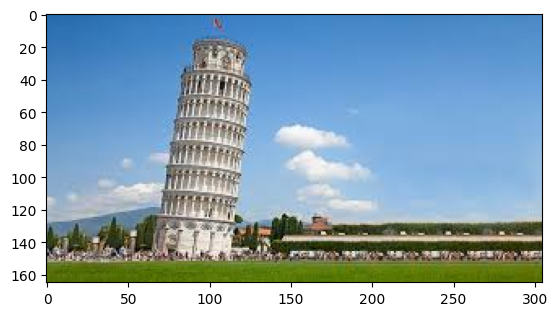

In [4]:
pisa = cv2.imread("PISA.jpg")
pisa = cv2.cvtColor(pisa,cv2.COLOR_BGR2RGB)
plt.imshow(pisa)

Convert the image to gray scale 

<function matplotlib.pyplot.show(close=None, block=None)>

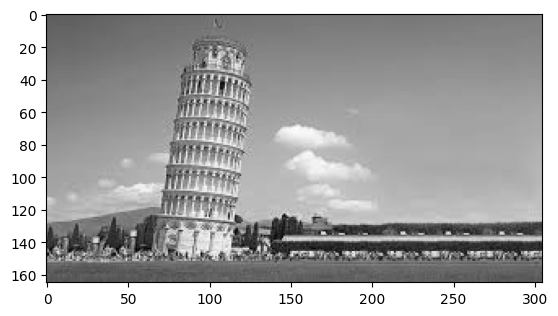

In [5]:
pisa_gray = cv2.cvtColor(pisa,cv2.COLOR_RGB2GRAY)
plt.imshow(pisa_gray,cmap = 'gray')
plt.show

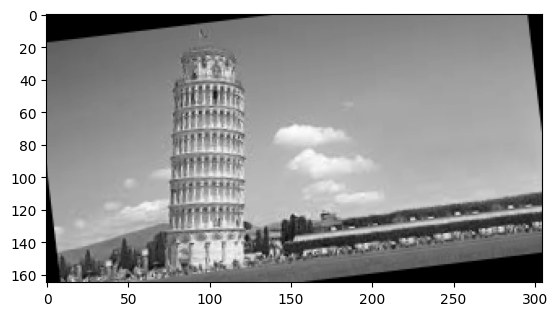

In [6]:

height, width = pisa_gray.shape[:2]

# Calculate the center of the image
center = (width // 2, height  // 2)

angle = 7
scale = 1.0

rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

pisa_rotated = cv2.warpAffine(pisa_gray, rotation_matrix, (width, height))

plt.imshow(pisa_rotated,cmap = 'gray')

In [7]:

def performRotation(img, angle):
    height, width = img.shape[:2]
    center = (width//2, height//2)
    angle = np.deg2rad(angle)
    x = [np.cos(angle), -np.sin(angle)]
    y = [np.sin(angle), np.cos(angle)]
    rot_m = np.array([x,y])
    
    # Create output 
    h_out = int(width * np.sin(angle) + height * np.cos(angle))
    w_out = int(width * np.cos(angle) + height  * np.sin(angle))

    
    rot_i = np.zeros((h_out, w_out))
    
    # Rotate the img
    for i in range(height):
        for j in range(width):
            x, y = np.dot(rot_m, [i - center[0], j - center[1]])
            x += center[0]
            y += center[1]
            if 0 <= x < h_out and 0 <= y < w_out:
                rot_i[int(x), int(y)] = img[i, j]
    
    return rot_i



In [8]:
def performRotation(image, angle):
    # finding the size of the image
    num_rows, num_cols = image.shape[:2]
    
    # To rotate in our favourable direction 
    angle = (-angle)

    # creating a new image with the same size as the original image
    final_image = np.zeros_like(image)
    
    # iterating through the image to find the new pixel values
    for x in range(num_rows):
        for y in range(num_cols):
            # storing the rotated coordinates of the pixel
            p_x = (x - num_rows/2) * np.cos(np.deg2rad(angle)) - (y - num_cols/2) * np.sin(np.deg2rad(angle)) + num_rows/2
            p_y = (x - num_rows/2) * np.sin(np.deg2rad(angle)) + (y - num_cols/2) * np.cos(np.deg2rad(angle)) + num_cols/2
            # checking if the rotated coordinates are within the image
            if p_x >= 0 and p_x < num_rows-1 and p_y >= 0 and p_y < num_cols-1:
                # finding the new pixel value using bilinear interpolation
                x1, y1 = int(p_x), int(p_y)
                x2, y2 = x1 + 1, y1 + 1
                # finding the pixel values of the 4 nearest neighbours
                x11 = image[x1, y1]
                x12 = image[x1, y2]
                x21 = image[x2, y1]
                x22 = image[x2, y2]
                # using distance formula to find the distance of the rotated pixel from the 4 nearest neighbours
                final_image[x, y] = (x11 * (x2 - p_x) * (y2 - p_y)) + (x12 * (x2 - p_x) * (p_y - y1)) + (x21 * (p_x - x1) * (y2 - p_y)) + (x22 * (p_x - x1) * (p_y - y1))
    return final_image

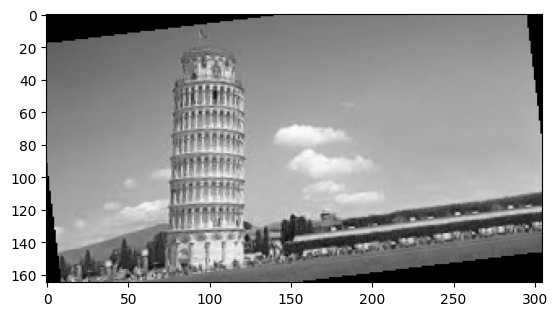

In [9]:
user_rotation = performRotation(pisa_gray,7)
plt.imshow(user_rotation,cmap='gray')

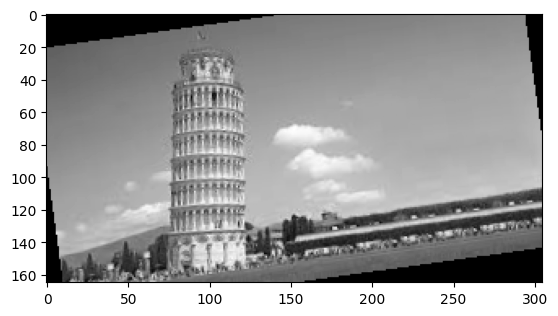

In [10]:
user_rotation = performRotation(pisa_gray,8)
plt.imshow(user_rotation,cmap = 'gray')

Iteratign over list of possible angles 

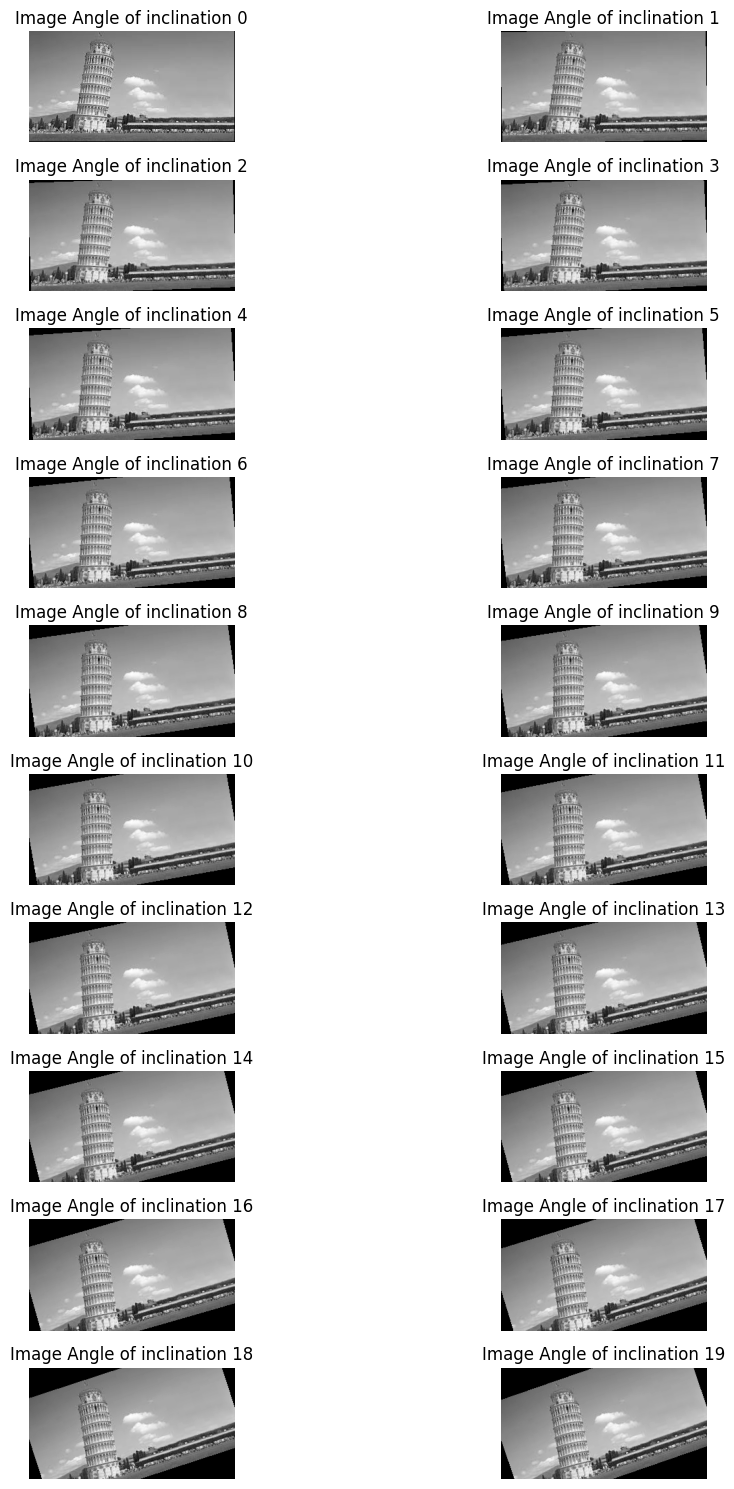

In [21]:
imageList = []
#plt.figure(figsize = (20,20))
for i in range(0,20):
    user_rotation = performRotation(pisa_gray,i)
    imageList.append(user_rotation)
# Create a figure with 5 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=10, ncols=2 , figsize=(12, 15))

# Flatten the axes array so that we can iterate over it with a single loop
axes = axes.flatten()

    # Iterate over the images and the subplots, and display each image in a subplot
for i, (image, ax) in enumerate(zip(imageList, axes)):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Image Angle of inclination {i}')
    ax.axis('off')

# Adjust the layout of the subplots and display the figure
plt.tight_layout()
plt.show()